In [1]:
%matplotlib inline
import ParsePlay
import Interpolate
import CharacterKMeans
import ScaleScores
import pprint
import SentimentAnalysis
import ScaleTime
import LowPassFilter
import Main
import ShaksGraphs as sg
import matplotlib.pyplot as plt
chars = ["OTHELLO_othello", "IAGO_othello", "DESDEMONA_othello", "CASSIO_othello"]

/Users/Chris/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## I. Introduction

This project aims to predict the archetypal relationships between major characters in works of Shakespearean literature using sentiment analysis. We used Python natural language and signal processing to study "sentiment functions" that we extracted from the chronological character speeches in particular plays. We have done an analysis on these functions to group characters into distinct clusters. Once these clusters were established, we used algorithms to classify new characters. We hope that this project can be applied to create similar techniques could be used to classify individuals on social media using a dataset of human dialog.

## II. Dataset

The data was sourced from the Project Gutenberg dataset of free online literature. We decided to focus exclusively on plays because they are entirely composed of dialog and are seperated into character dialog clearly. Shakespeare's plays were interesting because it is trivial to validate the clustering and predictions created by our methodology.

We originally attempted to parse the character dialog using portable document format copies of the text, but this turned out to be difficult due to the varying nature of the character lines. The team members found a source of the two hundred of Shakespeare's plays in XML form. The tree-like structure of the XML document allowed us to easily parse through the acts and speeches of the play.

Since many of Shakespeare's have over fifty characters, we experimented with including only a subset of characters from each play into our analysis. For the purposes of this report, we decided to include the five characters with the most dialog from each play in our analysis. We found that these characters have the most interesting sentiment functions.

## III. Methodology

We created the following flow chart to explain the steps of our analysis:

<img src="block_diagram_final_project__3_.png">

We show the steps of our analysis on 4 characters in our othello to provide a visualization of how we gather and transform the data for analysis.

### 1. Parsing and Scaling Character Speeches

We parsed the XML versions of Shakespeare's speeches to create a dictionary of all characters and their respective speeches. The dictionary entries corresponding to each character contain a tuple of the line number of a speech its raw text. We decided to preseve the punctuation and line breaks of each speech, as punctuation and having longer individual dialog portions can help with sentiment analysis.

Character dialogs often occur in irregular patterns, and may finish early in a play or begin late. To faciliate for this, we decided to scale the relative location of each character speech between 0 and 1. With this scaling, the first speech a character would make is 0 and the last 1. The spacings between thsee relative locations reflects their absolute spacing seen in the play. Our equation for calculating this is shown below.

<img src="formula1.png">

In [2]:
charDict = ParsePlay.getAllTopChars(5)

In [3]:
charDictScaled = ScaleTime.rescaleTime(charDict)

### 2. Sentiment Analysis:

In computing a sentiment for each of the charactes we referred to the Vader lexicon found in the NLTK Sentiment library. It is a rule-based sentiment analyzer that is tuned for observing sentiments from social media, but also works well on texts from other sources. This analyzer spits out a positive, negative and neutral values which add up to a sum of 1.0. By utilizing this we did scoring three different ways. One was substracting the positive from the negative, second one was summing the positive and the negative and the final one was a ratio of positive/negative. The difference and ratio scoring give us sentiment outputs that lets us look at the emotions of the characters through the play as they get happy/sad. The summing scoring was used for a different purpose though, by looking at the sum of positive and negative sentences we can see how active each character is throughout the play.

In [4]:
charScores = SentimentAnalysis.turn_lines_to_score(charDictScaled)

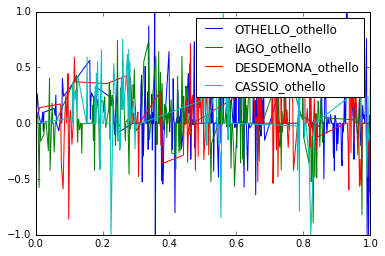

In [5]:
sg.compare(charScores, chars)

### 3. Score Preprocessing:

Characters line counts and locations varied considerably so we used linear interpolation to generate uniformly spaced samples for each of the character graphs. We chose to use 1000 samples to minimize information loss. We also realized that the graph looked very noisy, and the true character sentiment graphs would be easier to identify and compare if we removed high frequency noise. We decided to use a Savitzky Golay filter (which fits low order polynomials point by point) to smooth out the graphs. After smoothing the graphs, we scaled the scores to ensure that we are comparing shape of the sentiment graphs, rather than their magnitudes.

In [6]:
charScoresInterpolated = Interpolate.interpolate_chars_uniformly(charScores, 1000)

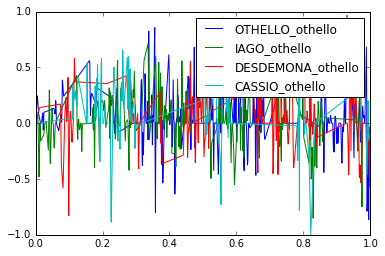

In [7]:
sg.compare(charScoresInterpolated, chars)

In [8]:
charScoresFiltered = LowPassFilter.lowPassAllChars(charScoresInterpolated, window_ratio=.1, poly_order=5)

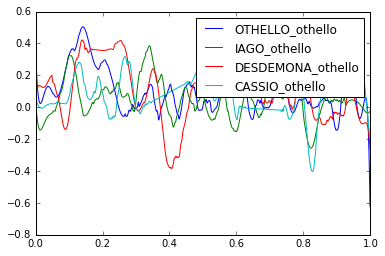

In [9]:
sg.compare(charScoresFiltered, chars)

In [10]:
charScoresScaled = ScaleScores.scale_all_scores(charScoresFiltered)

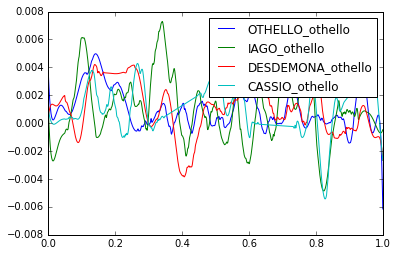

In [11]:
sg.compare(charScoresScaled, chars)

### 4. Classification (K Means):

We wrote a modified K Means algorithm to cluster the characters. To calculate a distance between two different graphs, we integrated the absolute value of the difference of the graph functions (essentially just finding the total area between the graphs). To calculate a new center for each cluster, we averaged each graph at every x point (since they all have matching x point) to "invent" a new character sentiment graph. The algorithm, just as with regular K Means, returns unlabeled clusters, left to the user to interpret.

<img src="formula2.png">

In [12]:
train, test = Main.getTrainTestSplit(charScoresScaled, numTest=1)

In [13]:
clusters = CharacterKMeans.characterKMeans(train, 5)
pp = pprint.PrettyPrinter()
predChars = zip(*clusters)[1]
pp.pprint(predChars)

(['GLOUCESTER_hen_vi_1',
  'ANTONIO_merchant',
  'PAULINA_win_tale',
  'CHARLES_hen_vi_1',
  'HELENA_all_well',
  'TROILUS_troilus',
  'QUEEN MARGARET_hen_vi_3',
  'QUEEN MARGARET_hen_vi_2',
  'KING HENRY VIII_hen_viii',
  'SIR HUGH EVANS_m_wives',
  'BIRON_lll',
  'ORLANDO_as_you',
  'IAGO_othello',
  'PERICLES_pericles',
  'HOTSPUR_hen_iv_1',
  'PRINCE HENRY_hen_iv_1',
  'PRINCE HENRY_hen_iv_2',
  'CARDINAL WOLSEY_hen_viii',
  'ANTIPHOLUS OF EPHESUS_com_err',
  'ANTONY_j_caesar',
  'BOTTOM_dream',
  'GONZALO_tempest',
  'PETRUCHIO_taming',
  'THESEUS_dream',
  'WARWICK_hen_vi_3',
  'GLOUCESTER_rich_iii',
  'HORTENSIO_taming',
  'Constable_hen_v',
  'KING RICHARD III_rich_iii',
  'PROTEUS_two_gent',
  'BAPTISTA_taming',
  'BENEDICK_much_ado',
  'CAMILLO_win_tale',
  'Lord Chief-Justice_hen_iv_2',
  'SIR TOBY BELCH_t_night',
  'DEMETRIUS_dream',
  'GLOUCESTER_lear',
  'KING LEAR_lear',
  'AUTOLYCUS_win_tale',
  'MERCUTIO_r_and_j',
  'FERDINAND_lll',
  'OCTAVIUS CAESAR_a_and_c',
  'BERT

In [14]:
clusters2 = CharacterKMeans.characterKMeans(charScoresFiltered, 5) # Without scaling scores
predChars2 = zip(*clusters2)[1]
pp.pprint(predChars2)

(['MARCUS ANDRONICUS_titus',
  'KING JOHN_john',
  'GLOUCESTER_hen_vi_1',
  'LUCIO_m_for_m',
  'DROMIO OF SYRACUSE_com_err',
  'HENRY BOLINGBROKE_rich_ii',
  'PAULINA_win_tale',
  'TROILUS_troilus',
  'QUEEN MARGARET_hen_vi_3',
  'QUEEN MARGARET_hen_vi_2',
  'BIRON_lll',
  'IAGO_othello',
  'PRINCE HENRY_hen_iv_1',
  'PRINCE HENRY_hen_iv_2',
  'BOTTOM_dream',
  'GONZALO_tempest',
  'THESEUS_dream',
  'WARWICK_hen_vi_3',
  'GLOUCESTER_rich_iii',
  'HORTENSIO_taming',
  'Constable_hen_v',
  'KING RICHARD III_rich_iii',
  'BAPTISTA_taming',
  'Lord Chief-Justice_hen_iv_2',
  'SIR TOBY BELCH_t_night',
  'AUTOLYCUS_win_tale',
  'OCTAVIUS CAESAR_a_and_c',
  'LORD POLONIUS_hamlet',
  'ANGELO_m_for_m',
  'DUKE OF YORK_rich_ii',
  'KING PHILIP_john',
  'DOMITIUS ENOBARBUS_a_and_c',
  'CLEOPATRA_a_and_c',
  'AARON_titus',
  'PANDARUS_troilus',
  'DUKE VINCENTIO_m_for_m',
  'KING EDWARD IV_hen_vi_3',
  'KING HENRY V_hen_v',
  'ROSALIND_as_you',
  'HORATIO_hamlet',
  'ALCIBIADES_timon',
  'PRINCES

## V. Future Work 

Moving forward there are several opportunities to make enhancements to our project. First off instead of using the built in Savitzky Golay function for our low pass filtering (LPF) we can use a true LPF which wil be done using a Fourier Transform. This may gave us a clearer graph to look at when comparing. Another would be to make a better loss function than what we currently have for prediction of character sentiment. 

One major change that can be made is to replace the built in sentiment analyzer with one we create ourselves. Since we used an analzyer that is used to process modern day english, one that can be built using shakespearean dictionaries for positive and negative words might spit out a more accurate result. We could also look at the word2vec model to look at the vector representations of words, which we can use to see if it gives out better results when processing the plays. 

Finally, looking at a different way to score the classfication of our characters will help group similar characters together better rather than having one huge group and several smaller groups with just a couple characters. Another thing it would help out in identifying if the groups actually fit well by creating some kind of accuracy score. 

## VI. Conclusion
Our goal of predicting relationships between the major characters in shakespeare's plays worked out well for a basic analysis. By using the sentiment  analzyer from NLTK and the XMl reader from python we were able to study the sentiment time series of the characters in chronological order of the play we are parsing. After parsing, we scaled the scores and times for processing and comparison. By comparing the graphs of these sentiments we were able to verify that the comparisons for the characters were giving good results. 

Finally we built a K means to find the K centers which was the different groups of characters. During this we removed some characters to use as a test against our model and saw the accuracy of our prediction. Although this is a basic version of the sentiment analysis on shakespeare's work, with more time and by building on top of it a much more accurate predictor can be built.